In [4]:
import os
# Change to your project directory
os.chdir(r'C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis')


In [5]:
# Import the load_data function from the utils file
from utils.file_upload import load_data  # Adjust the path according to your project structure

# Load the data
xdr_data_df = load_data()

# Display the DataFrame
print(xdr_data_df.head())  # Display the first 5 rows of the DataFrame

C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis\utils\file_upload.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  xdr_data_df = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [6]:
import pandas as pd
import numpy as np

# Replace "None" with NaN in the Handset Type column
xdr_data_df['Handset Type'].replace("None", np.nan, inplace=True)

# Function to replace missing values and outliers
def replace_missing_outliers(series):
    mean_value = series.mean()
    series_filled = series.fillna(mean_value)

    # Define outlier thresholds (using 1.5 * IQR as a simple example)
    Q1 = series_filled.quantile(0.25)
    Q3 = series_filled.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the mean
    series_outlier_corrected = series_filled.where(
        (series_filled >= lower_bound) & (series_filled <= upper_bound),
        mean_value
    )

    return series_outlier_corrected

# Function to fill missing values with mode
def mode_safe(series):
    mode_value = series.mode().iloc[0] if not series.mode().empty else np.nan
    series_filled = series.fillna(mode_value)
    return series_filled

# Fill missing values in 'Handset Type' column using mode_safe
xdr_data_df['Handset Type'] = mode_safe(xdr_data_df['Handset Type'])

# Replace missing values and outliers in numeric columns
xdr_data_df['TCP DL Retrans. Vol (Bytes)'] = replace_missing_outliers(xdr_data_df['TCP DL Retrans. Vol (Bytes)'])
xdr_data_df['Avg RTT DL (ms)'] = replace_missing_outliers(xdr_data_df['Avg RTT DL (ms)'])
xdr_data_df['Avg RTT UL (ms)'] = replace_missing_outliers(xdr_data_df['Avg RTT UL (ms)'])
xdr_data_df['Avg Bearer TP DL (kbps)'] = replace_missing_outliers(xdr_data_df['Avg Bearer TP DL (kbps)'])
xdr_data_df['Avg Bearer TP UL (kbps)'] = replace_missing_outliers(xdr_data_df['Avg Bearer TP UL (kbps)'])

# Aggregate data per customer we use IMSI because it is unique per customer as it doesnt change for that specific handset
aggregated_data = xdr_data_df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',    # Average TCP retransmission
    'Avg RTT DL (ms)': 'mean',                # Average RTT for DL
    'Avg RTT UL (ms)': 'mean',                # Average RTT for UL
    'Handset Type': mode_safe,                # Mode for Handset Type
    'Avg Bearer TP DL (kbps)': 'mean',        # Average throughput for DL
    'Avg Bearer TP UL (kbps)': 'mean'         # Average throughput for UL
}).reset_index()

print(aggregated_data)



C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3167868438.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdr_data_df['Handset Type'].replace("None", np.nan, inplace=True)


        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0        3.360100e+10                 2.080991e+07        46.000000   
1        3.360100e+10                 2.080991e+07        30.000000   
2        3.360100e+10                 2.080991e+07       109.795706   
3        3.360101e+10                 1.066000e+03        69.000000   
4        3.360101e+10                 1.507977e+07        57.000000   
...               ...                          ...              ...   
106851   3.379000e+10                 2.150440e+05        42.000000   
106852   3.379000e+10                 2.080991e+07        34.000000   
106853   3.197021e+12                 2.080991e+07       109.795706   
106854   3.370000e+14                 2.080991e+07       109.795706   
106855   8.823971e+14                 2.080991e+07       109.795706   

        Avg RTT UL (ms)                                       Handset Type  \
0              0.000000                     Huawei P20 Lite Huawei No

In [7]:
import pandas as pd

# Define a function to compute top, bottom, and most frequent values
def compute_statistics(series, top_n=10):
    top_values = series.nlargest(top_n)
    bottom_values = series.nsmallest(top_n)
    most_frequent_values = series.value_counts().head(top_n)
    return top_values, bottom_values, most_frequent_values

# Compute statistics for TCP DL Retrans. Vol (Bytes)
tcp_top, tcp_bottom, tcp_most_frequent = compute_statistics(xdr_data_df['TCP DL Retrans. Vol (Bytes)'])

# Compute statistics for Avg RTT DL (ms)
rtt_dl_top, rtt_dl_bottom, rtt_dl_most_frequent = compute_statistics(xdr_data_df['Avg RTT DL (ms)'])

# Compute statistics for Avg RTT UL (ms)
rtt_ul_top, rtt_ul_bottom, rtt_ul_most_frequent = compute_statistics(xdr_data_df['Avg RTT UL (ms)'])

# Compute statistics for Avg Bearer TP DL (kbps)
tp_dl_top, tp_dl_bottom, tp_dl_most_frequent = compute_statistics(xdr_data_df['Avg Bearer TP DL (kbps)'])

# Compute statistics for Avg Bearer TP UL (kbps)
tp_ul_top, tp_ul_bottom, tp_ul_most_frequent = compute_statistics(xdr_data_df['Avg Bearer TP UL (kbps)'])

# Display results
print("Top 10 TCP DL Retrans. Vol (Bytes):")
print(tcp_top)
print("\nBottom 10 TCP DL Retrans. Vol (Bytes):")
print(tcp_bottom)
print("\nMost Frequent TCP DL Retrans. Vol (Bytes):")
print(tcp_most_frequent)

print("\nTop 10 Avg RTT DL (ms):")
print(rtt_dl_top)
print("\nBottom 10 Avg RTT DL (ms):")
print(rtt_dl_bottom)
print("\nMost Frequent Avg RTT DL (ms):")
print(rtt_dl_most_frequent)

print("\nTop 10 Avg RTT UL (ms):")
print(rtt_ul_top)
print("\nBottom 10 Avg RTT UL (ms):")
print(rtt_ul_bottom)
print("\nMost Frequent Avg RTT UL (ms):")
print(rtt_ul_most_frequent)

print("\nTop 10 Avg Bearer TP DL (kbps):")
print(tp_dl_top)
print("\nBottom 10 Avg Bearer TP DL (kbps):")
print(tp_dl_bottom)
print("\nMost Frequent Avg Bearer TP DL (kbps):")
print(tp_dl_most_frequent)

print("\nTop 10 Avg Bearer TP UL (kbps):")
print(tp_ul_top)
print("\nBottom 10 Avg Bearer TP UL (kbps):")
print(tp_ul_bottom)
print("\nMost Frequent Avg Bearer TP UL (kbps):")
print(tp_ul_most_frequent)


Top 10 TCP DL Retrans. Vol (Bytes):
6421      50021024.0
138739    49991791.0
66754     49986834.0
136231    49986038.0
76025     49969605.0
77840     49921268.0
143262    49833677.0
116528    49779123.0
9726      49777538.0
139884    49663906.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP DL Retrans. Vol (Bytes):
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP DL Retrans. Vol (Bytes):
TCP DL Retrans. Vol (Bytes)
2.080991e+07    90671
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: count, dtype: int64

Top 10 Avg RTT DL (ms):
475      221.0
3128     221.0
5416     221.0
5824     221.0
8464     221.0
9391     221.0
10456    221.0
14120    221.0
17469    22

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_values.values, y=most_frequent_values.in

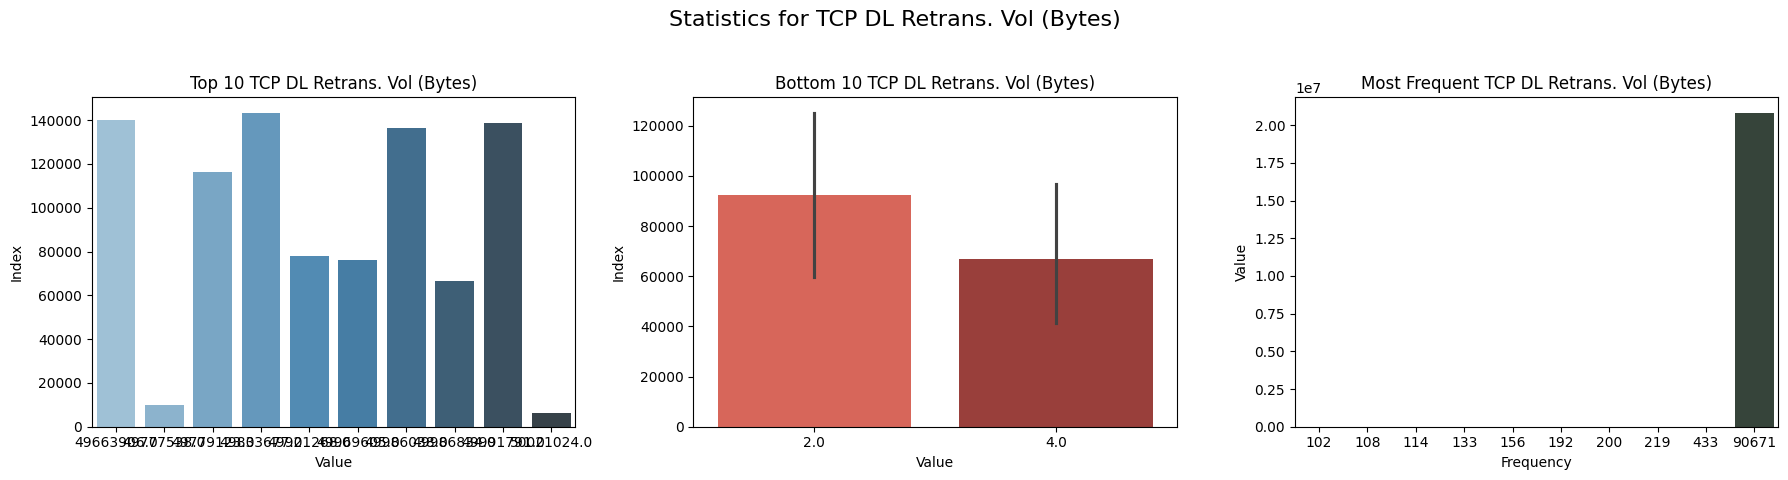

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_values.values, y=most_frequent_values.in

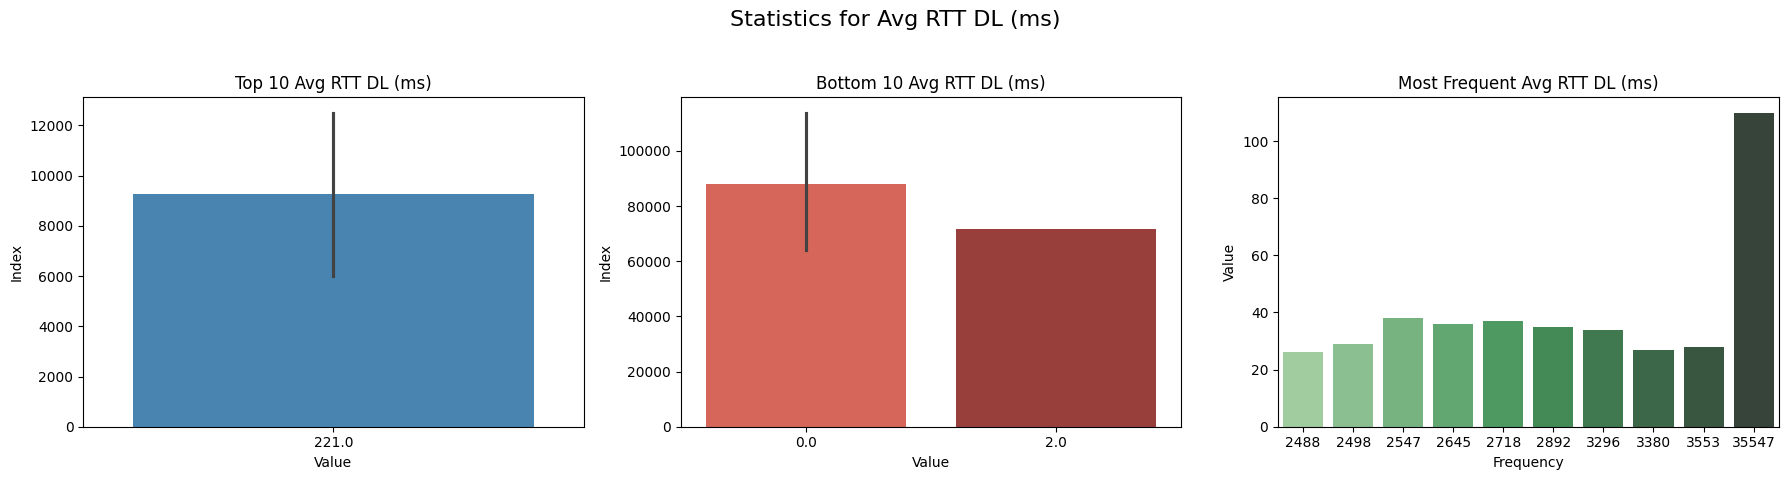

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_values.values, y=most_frequent_values.in

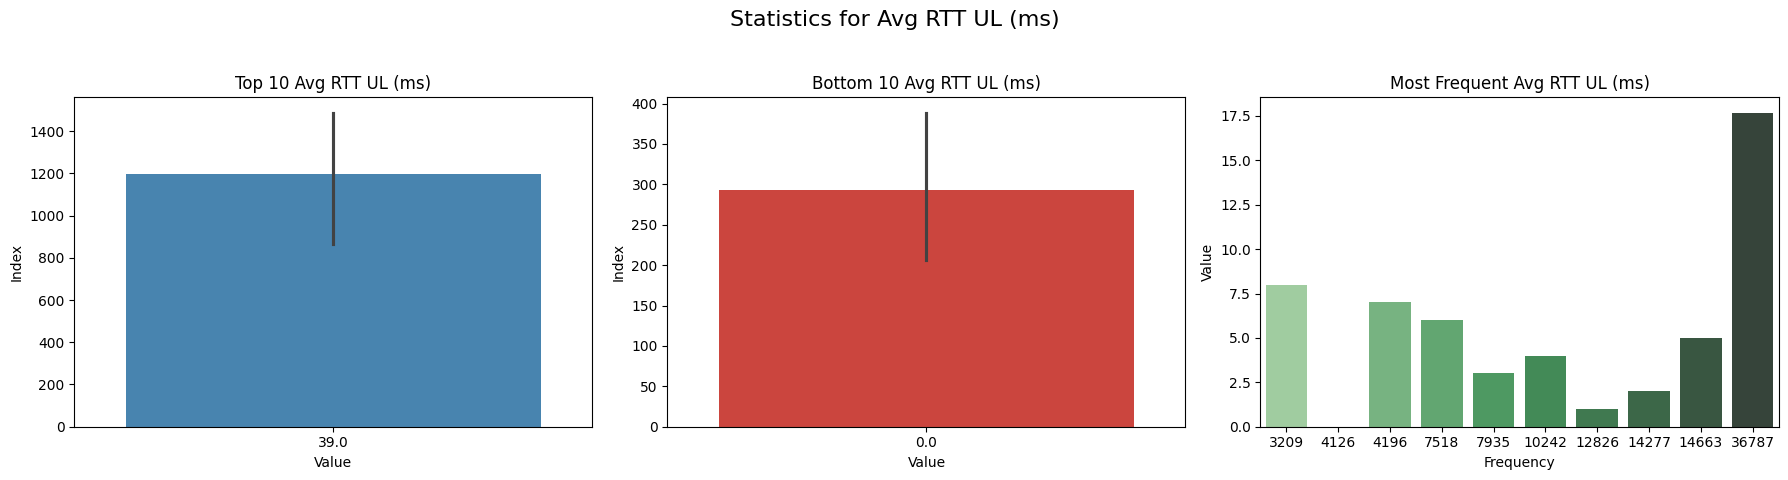

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_values.values, y=most_frequent_values.in

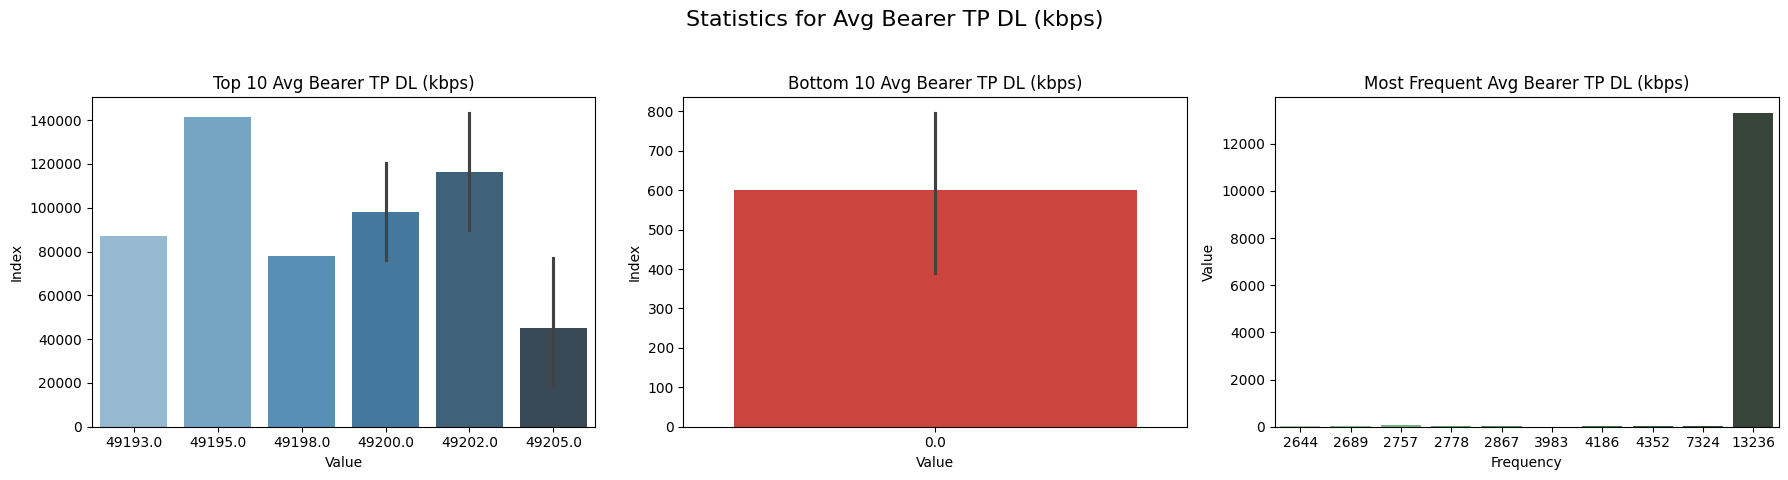

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3071833824.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_values.values, y=most_frequent_values.in

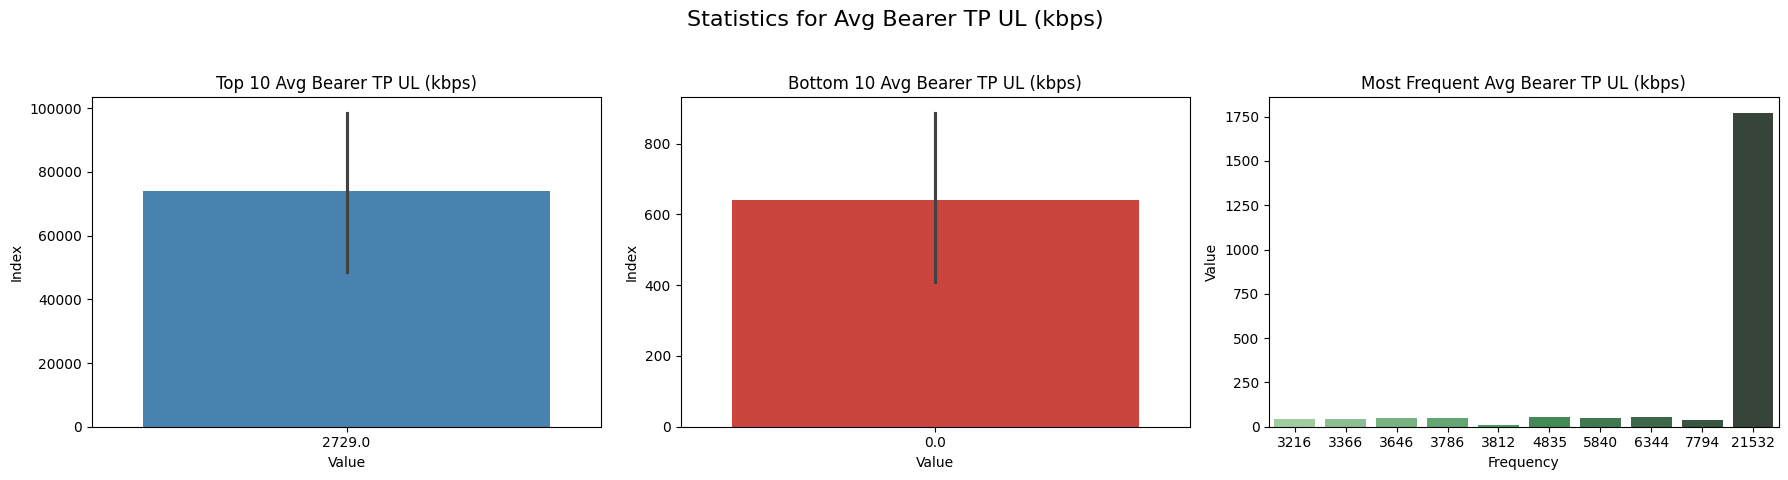

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot top, bottom, and most frequent values for a given series
def plot_statistics(series, column_name, top_n=10):
    # Compute the top, bottom, and most frequent values
    top_values = series.nlargest(top_n)
    bottom_values = series.nsmallest(top_n)
    most_frequent_values = series.value_counts().head(top_n)
    
    # Set up the plotting area with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Statistics for {column_name}', fontsize=16)
    
    # Plot the top values
    sns.barplot(x=top_values.values, y=top_values.index, ax=axes[0], palette='Blues_d')
    axes[0].set_title(f'Top {top_n} {column_name}')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Index')

    # Plot the bottom values
    sns.barplot(x=bottom_values.values, y=bottom_values.index, ax=axes[1], palette='Reds_d')
    axes[1].set_title(f'Bottom {top_n} {column_name}')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Index')
    
    # Plot the most frequent values
    sns.barplot(x=most_frequent_values.values, y=most_frequent_values.index, ax=axes[2], palette='Greens_d')
    axes[2].set_title(f'Most Frequent {column_name}')
    axes[2].set_xlabel('Frequency')
    axes[2].set_ylabel('Value')
    
    # Adjust layout and show plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot statistics for each of the specified columns
plot_statistics(xdr_data_df['TCP DL Retrans. Vol (Bytes)'], 'TCP DL Retrans. Vol (Bytes)')
plot_statistics(xdr_data_df['Avg RTT DL (ms)'], 'Avg RTT DL (ms)')
plot_statistics(xdr_data_df['Avg RTT UL (ms)'], 'Avg RTT UL (ms)')
plot_statistics(xdr_data_df['Avg Bearer TP DL (kbps)'], 'Avg Bearer TP DL (kbps)')
plot_statistics(xdr_data_df['Avg Bearer TP UL (kbps)'], 'Avg Bearer TP UL (kbps)')



In [9]:
# Group the dataset by 'Handset Type' and calculate the mean throughput and TCP retransmission
throughput_per_handset = xdr_data_df.groupby('Handset Type')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()
tcp_retransmission_per_handset = xdr_data_df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()

# Display the first few rows of each result
print("Average Throughput per Handset Type:")
print(throughput_per_handset.head())

print("\nAverage TCP Retransmission per Handset Type:")
print(tcp_retransmission_per_handset.head())


Average Throughput per Handset Type:
                                   Avg Bearer TP DL (kbps)  \
Handset Type                                                 
A-Link Telecom I. Cubot A5                    23184.000000   
A-Link Telecom I. Cubot Note Plus              6527.000000   
A-Link Telecom I. Cubot Note S                 8515.000000   
A-Link Telecom I. Cubot Nova                  13300.045927   
A-Link Telecom I. Cubot Power                 13300.045927   

                                   Avg Bearer TP UL (kbps)  
Handset Type                                                
A-Link Telecom I. Cubot A5                           326.0  
A-Link Telecom I. Cubot Note Plus                    172.0  
A-Link Telecom I. Cubot Note S                       422.0  
A-Link Telecom I. Cubot Nova                         550.0  
A-Link Telecom I. Cubot Power                        342.0  

Average TCP Retransmission per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5           2.080

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'aggregated_data' DataFrame from your previous aggregation

# Check the data types in the 'Handset Type' column
print(aggregated_data['Handset Type'].apply(type))

# If the types are arrays/lists, convert them to strings
aggregated_data['Handset Type'] = aggregated_data['Handset Type'].astype(str)

# Compute the average throughput and average TCP retransmission per Handset Type
average_distribution = aggregated_data.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',           # Average download throughput per Handset Type
    'Avg Bearer TP UL (kbps)': 'mean',           # Average upload throughput per Handset Type
    'TCP DL Retrans. Vol (Bytes)': 'mean'        # Average TCP retransmission per Handset Type
}).reset_index()

# Print the results
print(average_distribution)



0                   <class 'str'>
1                   <class 'str'>
2                   <class 'str'>
3                   <class 'str'>
4         <class 'numpy.ndarray'>
                   ...           
106851              <class 'str'>
106852              <class 'str'>
106853              <class 'str'>
106854              <class 'str'>
106855              <class 'str'>
Name: Handset Type, Length: 106856, dtype: object
                                           Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
2130  ['undefined' 'undefined' 'undefined' 'undefine...   
2131  ['undefined' 'undefined' 'undefined' 'undefined']   
2132              ['undefined' 'undefined' 'u

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3586397928.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='Handset Type', data=top_10_dl, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3586397928.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='Handset Type', data=bottom_10_dl, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3586397928.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP UL (kbps)', y='Handse

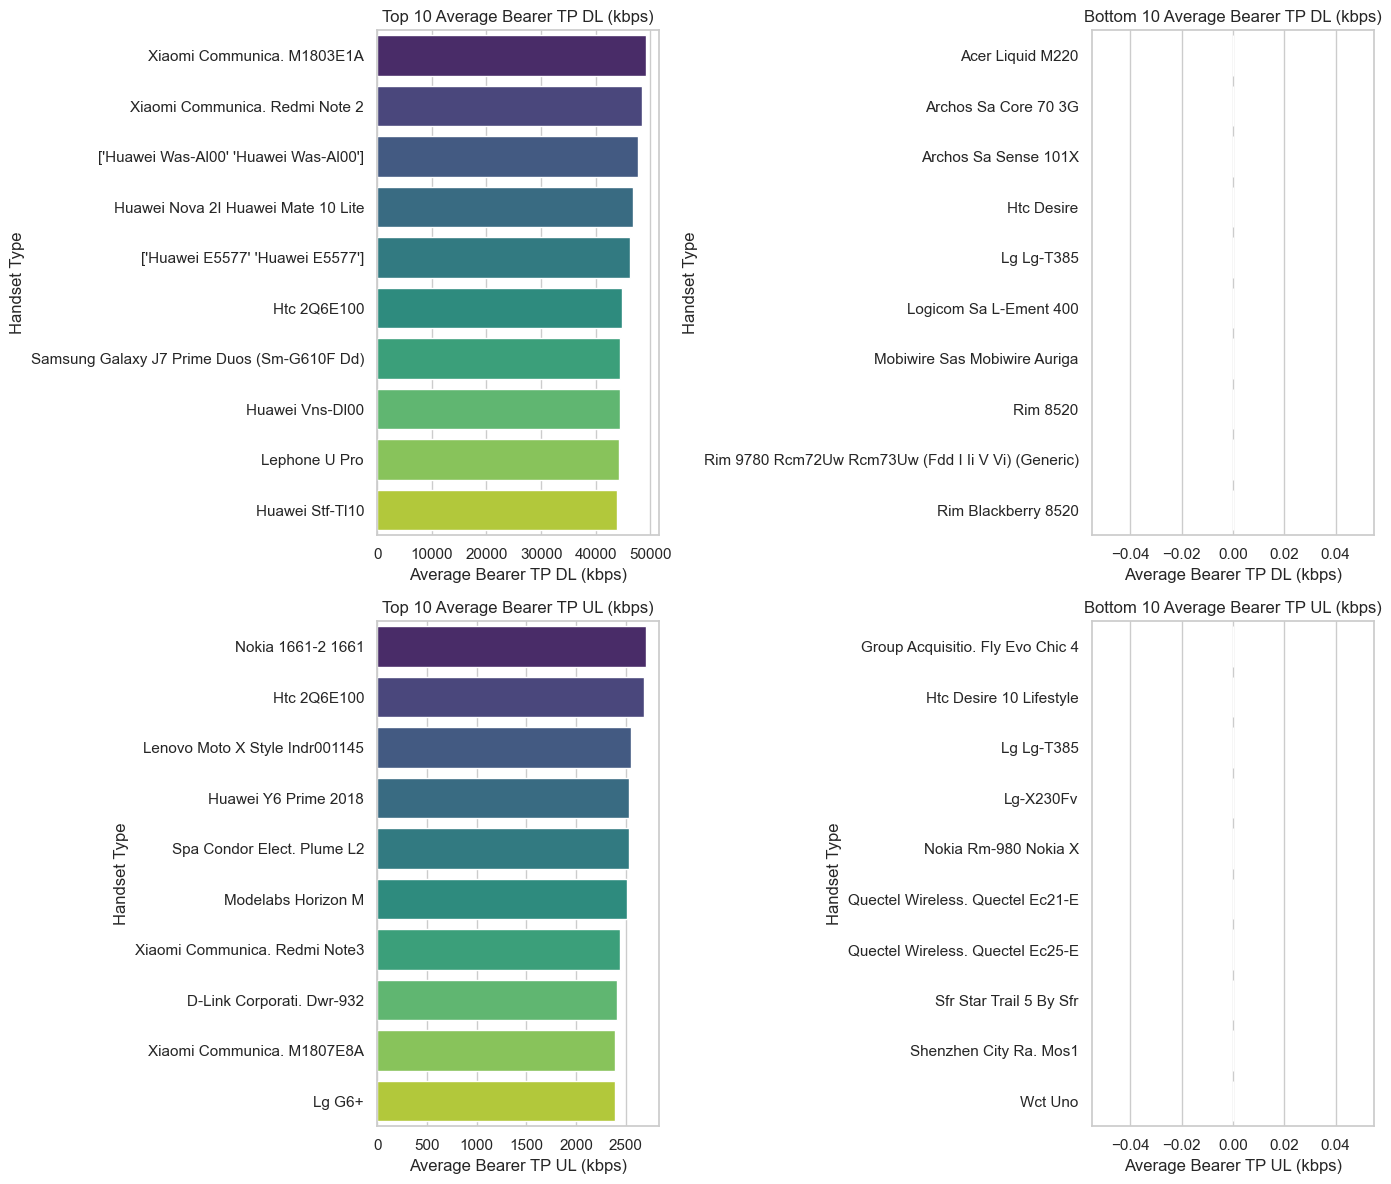

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'average_distribution' DataFrame computed from your previous aggregation

# Sorting for Top 10 and Bottom 10
top_10_dl = average_distribution.nlargest(10, 'Avg Bearer TP DL (kbps)')
bottom_10_dl = average_distribution.nsmallest(10, 'Avg Bearer TP DL (kbps)')
top_10_ul = average_distribution.nlargest(10, 'Avg Bearer TP UL (kbps)')
bottom_10_ul = average_distribution.nsmallest(10, 'Avg Bearer TP UL (kbps)')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 12))

# Plotting Top 10 Avg Bearer TP DL
plt.subplot(2, 2, 1)
sns.barplot(x='Avg Bearer TP DL (kbps)', y='Handset Type', data=top_10_dl, palette='viridis')
plt.title('Top 10 Average Bearer TP DL (kbps)')
plt.xlabel('Average Bearer TP DL (kbps)')
plt.ylabel('Handset Type')

# Plotting Bottom 10 Avg Bearer TP DL
plt.subplot(2, 2, 2)
sns.barplot(x='Avg Bearer TP DL (kbps)', y='Handset Type', data=bottom_10_dl, palette='viridis')
plt.title('Bottom 10 Average Bearer TP DL (kbps)')
plt.xlabel('Average Bearer TP DL (kbps)')
plt.ylabel('Handset Type')

# Plotting Top 10 Avg Bearer TP UL
plt.subplot(2, 2, 3)
sns.barplot(x='Avg Bearer TP UL (kbps)', y='Handset Type', data=top_10_ul, palette='viridis')
plt.title('Top 10 Average Bearer TP UL (kbps)')
plt.xlabel('Average Bearer TP UL (kbps)')
plt.ylabel('Handset Type')

# Plotting Bottom 10 Avg Bearer TP UL
plt.subplot(2, 2, 4)
sns.barplot(x='Avg Bearer TP UL (kbps)', y='Handset Type', data=bottom_10_ul, palette='viridis')
plt.title('Bottom 10 Average Bearer TP UL (kbps)')
plt.xlabel('Average Bearer TP UL (kbps)')
plt.ylabel('Handset Type')

# Show plots
plt.tight_layout()
plt.show()


C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\2188442248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=top_10_handsets, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\2188442248.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=bottom_10_handsets, palette='viridis')


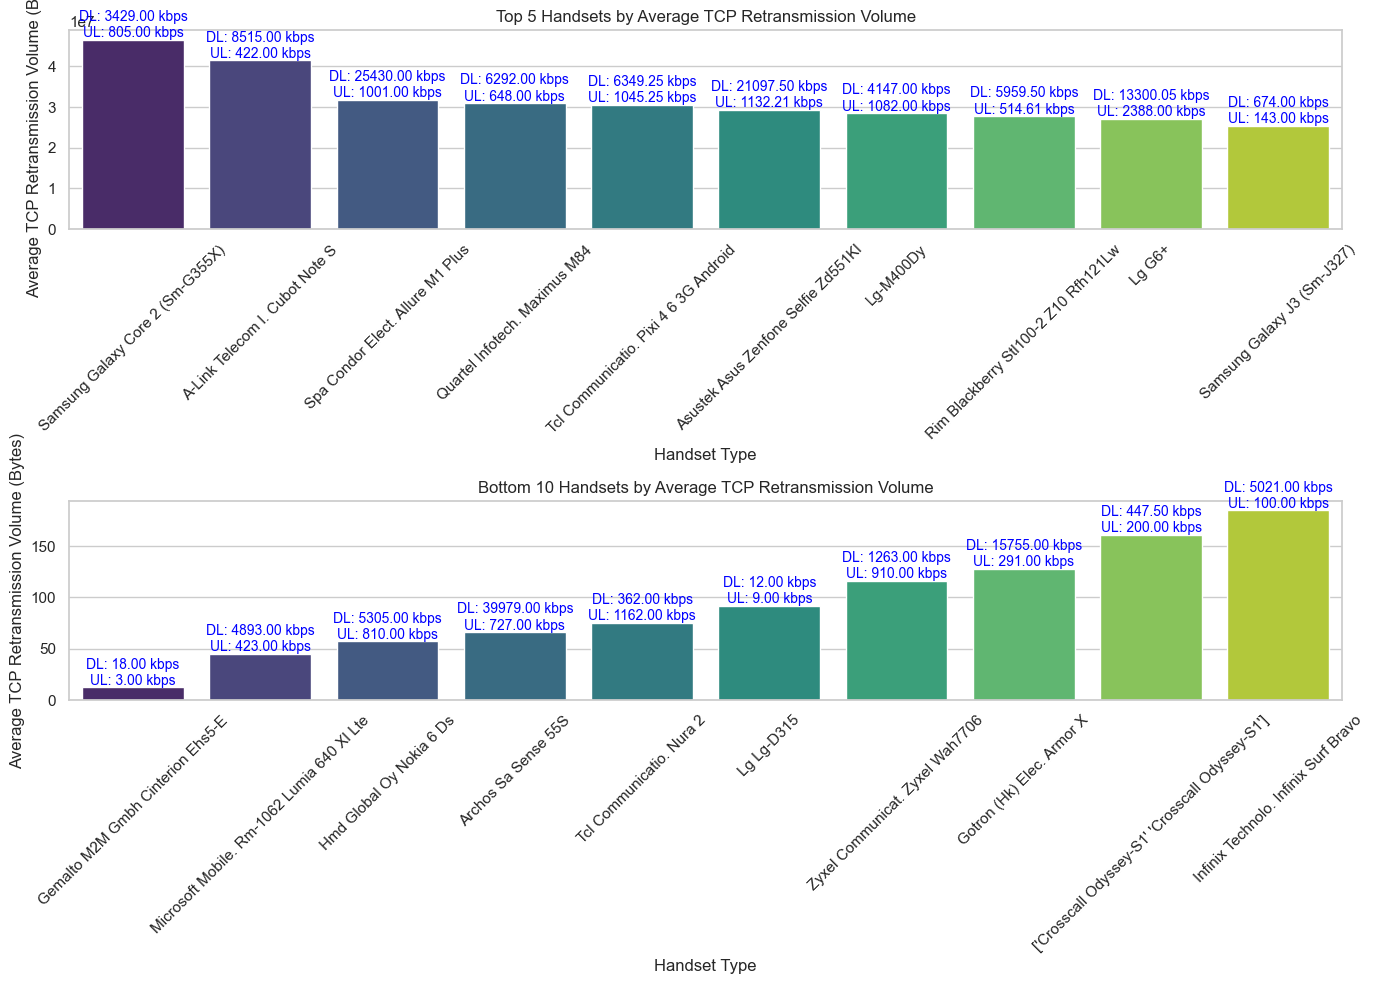

In [12]:


# Identify the top 5 and bottom 10 handsets based on Average TCP Retransmission Volume
top_10_handsets = average_distribution.nlargest(10, 'TCP DL Retrans. Vol (Bytes)')
bottom_10_handsets = average_distribution.nsmallest(10, 'TCP DL Retrans. Vol (Bytes)')

# Create the plots
plt.figure(figsize=(14, 10))

# Plotting Top 5 Handsets
plt.subplot(2, 1, 1)
sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=top_10_handsets, palette='viridis')
plt.title('Top 5 Handsets by Average TCP Retransmission Volume')
plt.xticks(rotation=45)
plt.ylabel('Average TCP Retransmission Volume (Bytes)')
plt.xlabel('Handset Type')

# Add average DL and UL throughput to the same plot for Top 5
for i in range(top_10_handsets.shape[0]):
    plt.text(i, top_10_handsets['TCP DL Retrans. Vol (Bytes)'].iloc[i], 
             f"DL: {top_10_handsets['Avg Bearer TP DL (kbps)'].iloc[i]:.2f} kbps\n"
             f"UL: {top_10_handsets['Avg Bearer TP UL (kbps)'].iloc[i]:.2f} kbps", 
             ha='center', va='bottom', color='blue', fontsize=10)

# Plotting Bottom 10 Handsets
plt.subplot(2, 1, 2)
sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=bottom_10_handsets, palette='viridis')
plt.title('Bottom 10 Handsets by Average TCP Retransmission Volume')
plt.xticks(rotation=45)
plt.ylabel('Average TCP Retransmission Volume (Bytes)')
plt.xlabel('Handset Type')

# Add average DL and UL throughput to the same plot for Bottom 10
for i in range(bottom_10_handsets.shape[0]):
    plt.text(i, bottom_10_handsets['TCP DL Retrans. Vol (Bytes)'].iloc[i], 
             f"DL: {bottom_10_handsets['Avg Bearer TP DL (kbps)'].iloc[i]:.2f} kbps\n"
             f"UL: {bottom_10_handsets['Avg Bearer TP UL (kbps)'].iloc[i]:.2f} kbps", 
             ha='center', va='bottom', color='blue', fontsize=10)

# Show plots
plt.tight_layout()
plt.show()


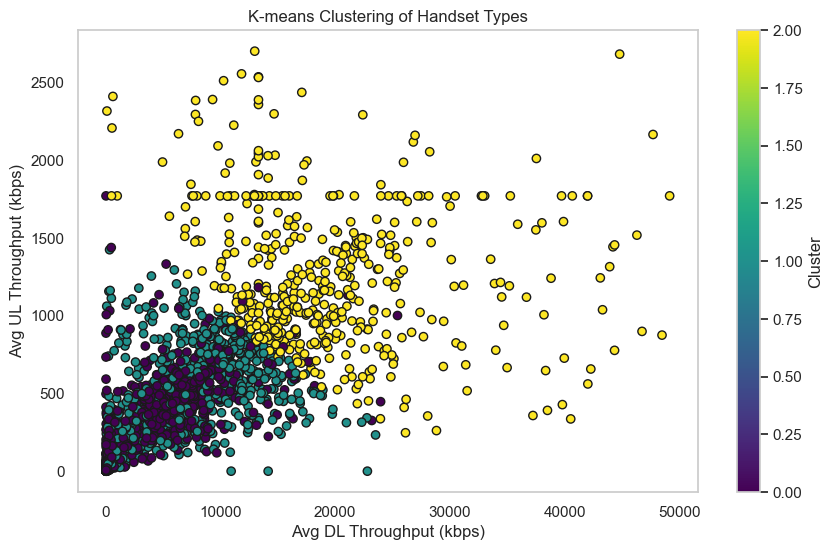

In [13]:
# Select relevant features for clustering
features = average_distribution[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)']]
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
average_distribution['Cluster'] = kmeans.fit_predict(scaled_features)
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_distribution['Avg Bearer TP DL (kbps)'], average_distribution['Avg Bearer TP UL (kbps)'],
            c=average_distribution['Cluster'], cmap='viridis', marker='o', edgecolor='k')

plt.title('K-means Clustering of Handset Types')
plt.xlabel('Avg DL Throughput (kbps)')
plt.ylabel('Avg UL Throughput (kbps)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()



## Cluster Interpretations
### Cluster 0: Low Throughput, High Retransmissions

 This cluster likely represents devices that experience lower data throughput with significant retransmissions. This suggests network stability issues or lower device capabilities. Users in this group may face slower download and upload speeds, along with higher packet loss, leading to a more disrupted experience. These may be older devices or those in areas with weaker signal strength.

### Cluster 1: Moderate Throughput, Moderate Retransmissions
 This cluster represents devices with moderate throughput and a reasonable retransmission rate. Users in this group experience decent performance, suitable for everyday applications like browsing, streaming, and social media, though they might not have the same stability as the high-performing group. This could represent a mix of mid-tier devices or those on more stable connections compared to Cluster 0.

### Cluster 2: High Throughput, Low Retransmissions

Interpretation: Devices in this cluster are likely high-performing, offering the best download and upload speeds with lower retransmission volumes. Users in this group likely experience a more stable and efficient connection, suited for data-intensive activities like HD streaming, video calls, or online gaming. This cluster may consist of newer or high-end devices and could indicate areas with better network infrastructure or service quality.

##### Summary
Cluster 0 (Low Throughput, High Retransmissions): Lower performance and less stability, likely affecting user experience.
Cluster 1 (Moderate Throughput, Moderate Retransmissions): Moderate performance, balancing throughput and retransmission rates.
Cluster 2 (High Throughput, Low Retransmissions): High performance, with reliable connectivity and low retransmissions, offering the best user experience.

to see with the numerical example:

In [14]:
# Compute the average values for each feature per cluster
cluster_summary = average_distribution.groupby('Cluster').agg({
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'TCP DL Retrans. Vol (Bytes)': 'mean'
}).reset_index()

# Print the summary
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
    Cluster  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0        0              4080.812489               323.889032   
1        1              6831.921790               479.183478   
2        2             19494.855660              1265.267739   

   TCP DL Retrans. Vol (Bytes)  
0                 1.662870e+07  
1                 4.182529e+06  
2                 5.468247e+06  


### engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster
Although the clustering was initially done by Handset Type, we’re using the resulting low-performance profile (Cluster 0) as a benchmark to assess individual bearer sessions. This allows you to leverage handset type insights on a per-session basis, comparing individual session metrics to the handset-based low-performance cluster for engagement scoring.

This setup offers insight into how individual session experiences align with the broader device-based performance trends identified in the clustering.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances



# Normalize the features for xdr_data
scaled_xdr_data = scaler.transform(xdr_data_df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)']])

# Extract the centroid of Cluster 0 (representing low-engagement characteristics)
cluster_0_centroid = kmeans.cluster_centers_[0].reshape(1, -1)

# Compute Euclidean distance to the Cluster 0 centroid for each Bearer ID
engagement_scores = euclidean_distances(scaled_xdr_data, cluster_0_centroid).flatten()

# Add the engagement score to xdr_data
xdr_data_df['Engagement Score'] = engagement_scores

# Display the result
print(xdr_data_df[['Bearer Id', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'Engagement Score']])


           Bearer Id  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0       1.311448e+19                23.000000                44.000000   
1       1.311448e+19                16.000000                26.000000   
2       1.311448e+19                 6.000000                 9.000000   
3       1.311448e+19                44.000000                44.000000   
4       1.311448e+19                 6.000000                 9.000000   
...              ...                      ...                      ...   
149996  7.277826e+18                52.000000                65.000000   
149997  7.349883e+18                23.000000                54.000000   
149998  1.311448e+19                43.000000                47.000000   
149999  1.311448e+19                34.000000                37.000000   
150000           NaN             13300.045927              1770.428647   

        TCP DL Retrans. Vol (Bytes)  Engagement Score  
0                      2.080991e+07          0.949949  

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Define the columns of interest
feature_columns = [
    'Avg RTT DL (ms)', 
    'Avg RTT UL (ms)', 
    'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)', 
    'TCP DL Retrans. Vol (Bytes)', 
    'TCP UL Retrans. Vol (Bytes)'
]

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each feature column
for col in feature_columns:
    xdr_data_df = remove_outliers_iqr(xdr_data_df, col)

# Fill NaN values with the mean for each feature column
for col in feature_columns:
    mean_value = xdr_data_df[col].mean()
    xdr_data_df[col].fillna(mean_value, inplace=True)

# Verify if there are any NaN values left
if xdr_data_df[feature_columns].isnull().values.any():
    print("There are still NaN values in the DataFrame.")
else:
    print("No NaN values left.")

# Scale features for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(xdr_data_df[feature_columns])

# Fit KMeans model
n_clusters = 3  # Adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Assign clusters
xdr_data_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Identify centroids
centroids = kmeans.cluster_centers_

# Print the modified DataFrame to verify changes
print(xdr_data_df[feature_columns + ['Cluster']].describe())  # Summary statistics to see the changes


No NaN values left.
       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count     33348.000000     33348.000000             33348.000000   
mean         75.785047        12.691074             13742.127161   
std          41.555666         9.338768              9034.127430   
min          13.000000         0.000000                 0.000000   
25%          44.000000         5.000000              6865.750000   
50%          63.000000        10.000000             13300.045927   
75%         109.795706        17.662883             19659.000000   
max         221.000000        39.000000             33185.000000   

       Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
count             33348.000000                 3.334800e+04   
mean               1101.371104                 4.785881e+06   
std                 632.231061                 8.039103e+06   
min                   3.000000                 2.000000e+00   
25%                 511.000000                 7.539

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\866462577.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xdr_data_df[col].fillna(mean_value, inplace=True)


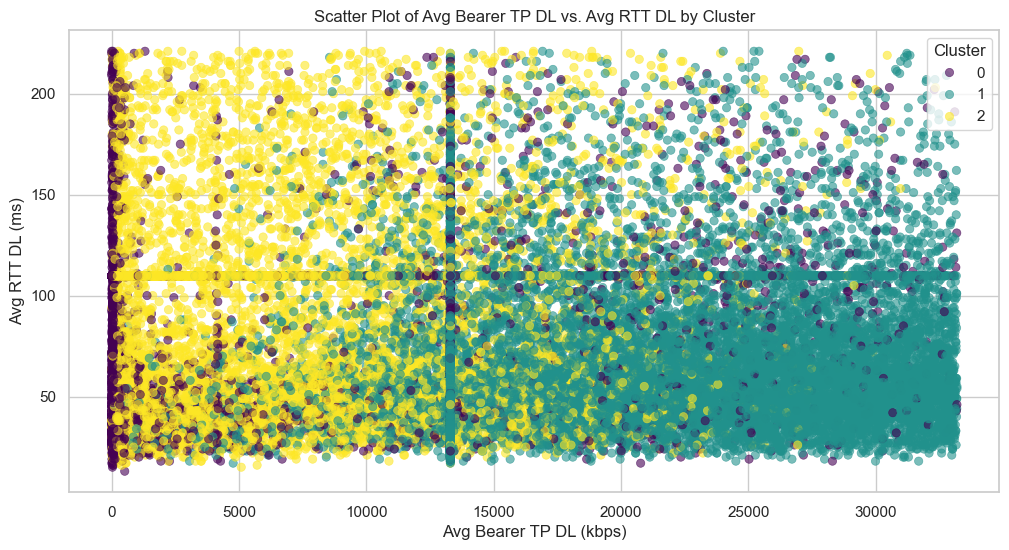

C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3959736511.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=xdr_data_df, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3959736511.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=xdr_data_df, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\ipykernel_22296\3959736511.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=xdr_data_df, palette='viridis')
C:\Users\sumey\AppData\Local\Temp\

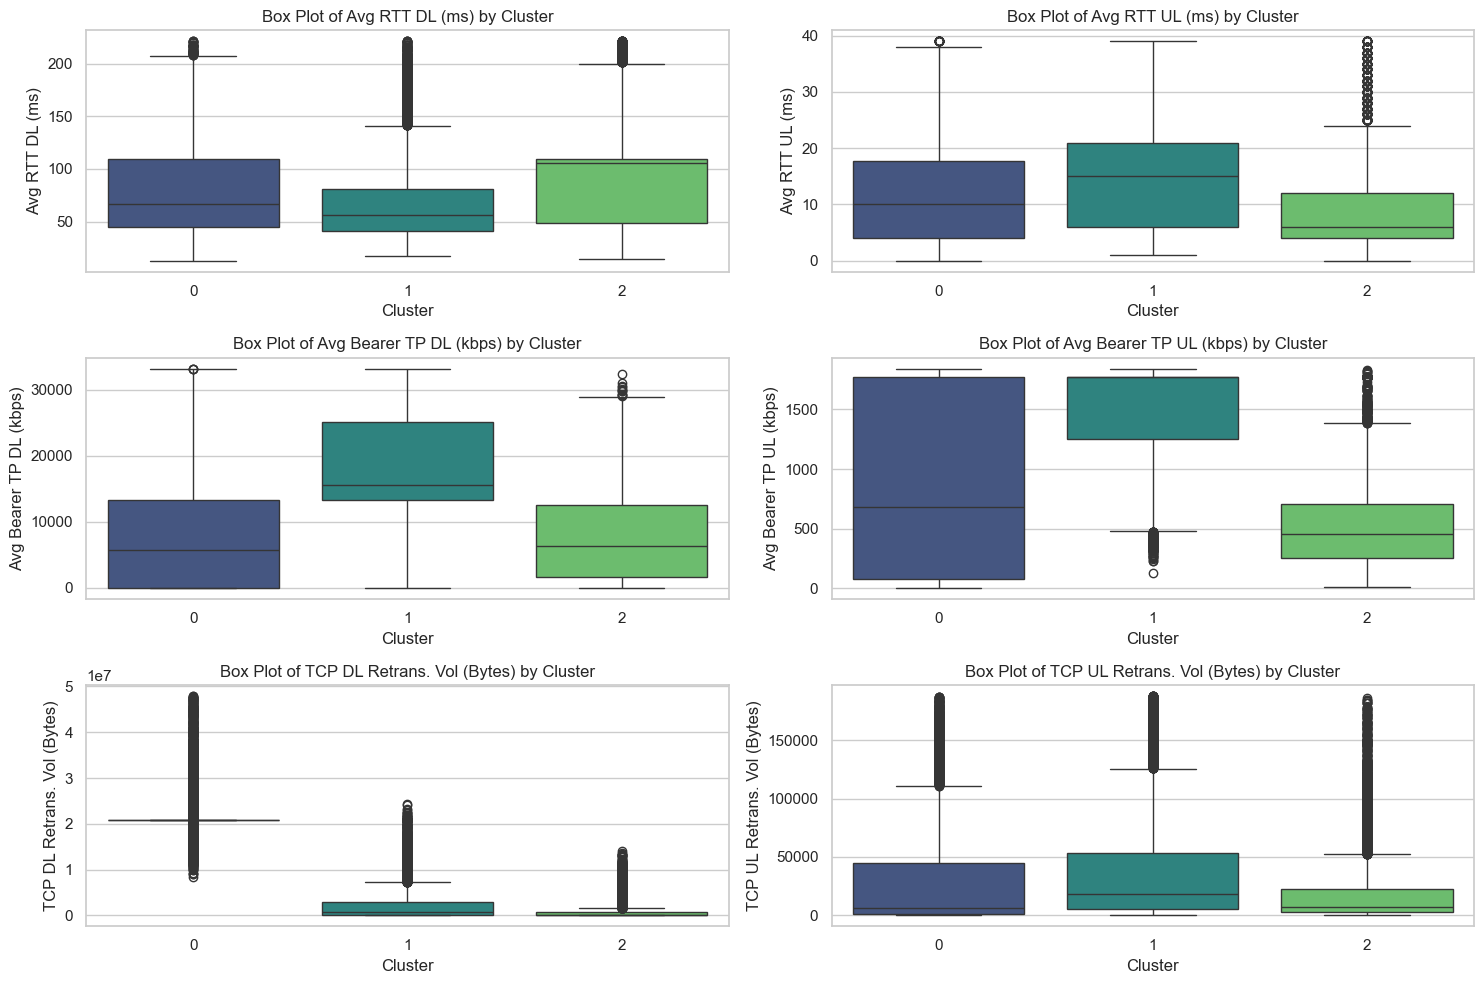

In [17]:

# Create visualizations
plt.figure(figsize=(12, 6))
sns.scatterplot(x=xdr_data_df['Avg Bearer TP DL (kbps)'], 
                y=xdr_data_df['Avg RTT DL (ms)'], 
                hue=xdr_data_df['Cluster'], 
                palette='viridis', 
                alpha=0.6, 
                edgecolor=None)
plt.title('Scatter Plot of Avg Bearer TP DL vs. Avg RTT DL by Cluster')
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('Avg RTT DL (ms)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Box plots for each feature per cluster
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster', y=col, data=xdr_data_df, palette='viridis')
    plt.title(f'Box Plot of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



### Cluster 0 
This cluster may represent users who experience mixed connectivity quality, characterized by moderate latency, varying download speeds, and higher retransmissions, which could lead to disruptions in service.
### Cluster 1
 This cluster likely represents users with a stable and efficient network experience, characterized by low latency and lower retransmission rates, although some users might still experience limitations in upload speeds.
### Cluster 2
 Cluster 2 seems to represent users enjoying superior network performance characterized by low latency, high download throughput, and reasonably good upload speeds, though some users may still encounter issues related to retransmission.
##### Overall Insights
Cluster Performance: Cluster 2 stands out as the best-performing group, while Cluster 0 may face significant challenges related to network quality.
Optimization Opportunities: There may be opportunities to improve the network experience for users in Cluster 0, potentially by addressing issues such as congestion and optimizing throughput.
Targeted Interventions: Understanding these clusters can help in tailoring network infrastructure improvements and service optimizations based on user behavior and connectivity patterns.












In [18]:
# Print examples for each cluster
for cluster_id in range(3):  # Assuming clusters are labeled as 0, 1, and 2
    print(f"Cluster {cluster_id} examples:")
    cluster_examples = xdr_data_df[xdr_data_df['Cluster'] == cluster_id].sample(3)  # Randomly sample 3 examples
    print(cluster_examples[feature_columns + ['Cluster']])
    print("\n")  # Print a newline for better readability


Cluster 0 examples:
        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
117225             20.0         7.000000             13300.045927   
88870             104.0        20.000000             29394.000000   
119777             38.0        17.662883             13300.045927   

        Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
117225              1770.428647                   27215237.0   
88870                580.000000                   15699708.0   
119777              1770.428647                   16750712.0   

        TCP UL Retrans. Vol (Bytes)  Cluster  
117225                       8161.0        0  
88870                        9310.0        0  
119777                      17212.0        0  


Cluster 1 examples:
        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
138261            115.0        17.662883                  32896.0   
67045             124.0        23.000000                  26818.0   
95338              36.0      

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Assuming xdr_data_df is your DataFrame and you have already performed KMeans clustering

# Step 1: Identify the worst experience cluster
# Here, we'll assume the worst experience cluster is the one with the maximum mean value of a certain metric.
# You can adjust this logic based on your needs.

# Let's say we want to find the worst cluster based on 'Avg RTT DL (ms)'
# You can use a different metric as needed.
worst_cluster_index = xdr_data_df.groupby('Cluster')['Avg RTT DL (ms)'].mean().idxmax()

# Get the centroid of the worst cluster
worst_cluster_centroid = kmeans.cluster_centers_[worst_cluster_index]

# Step 2: Calculate the Euclidean distance from each user's data point to the worst cluster centroid
# We can use pairwise_distances from sklearn to calculate the distance

# Select the features for distance calculation
distance_features = xdr_data_df[feature_columns]

# Calculate the Euclidean distance to the worst cluster centroid
xdr_data_df['Experience Score'] = np.linalg.norm(distance_features - worst_cluster_centroid, axis=1)

# Step 3: Print the DataFrame to verify the experience scores
print(xdr_data_df[['Cluster', 'Experience Score']].head())

# Optionally, you can summarize the experience scores
print(xdr_data_df['Experience Score'].describe())


    Cluster  Experience Score
14        0      3.275455e+07
20        1      9.844074e+06
43        1      2.210223e+05
50        1      8.320433e+04
61        2      2.199535e+06
count    3.334800e+04
mean     4.790158e+06
std      8.036733e+06
min      2.227668e+02
25%      8.687032e+04
50%      7.337732e+05
75%      4.727197e+06
max      4.791187e+07
Name: Experience Score, dtype: float64


In [20]:
# Assuming 'Experience Score' has already been calculated in xdr_data_df

# Step 1: Calculate the minimum and maximum of the Experience Score
min_experience = xdr_data_df['Experience Score'].min()
max_experience = xdr_data_df['Experience Score'].max()

# Step 2: Apply Min-Max normalization
xdr_data_df['Normalized Experience Score'] = (xdr_data_df['Experience Score'] - min_experience) / (max_experience - min_experience)

# Step 3: Print the DataFrame to verify the normalized experience scores
print(xdr_data_df[['Experience Score', 'Normalized Experience Score']].head())

# Optionally, you can summarize the normalized experience scores
print(xdr_data_df['Normalized Experience Score'].describe())


    Experience Score  Normalized Experience Score
14      3.275455e+07                     0.683640
20      9.844074e+06                     0.205458
43      2.210223e+05                     0.004608
50      8.320433e+04                     0.001732
61      2.199535e+06                     0.045904
count    33348.000000
mean         0.099974
std          0.167741
min          0.000000
25%          0.001808
50%          0.015310
75%          0.098660
max          1.000000
Name: Normalized Experience Score, dtype: float64


In [21]:
# Calculate the Experience Score based on your defined logic
# Assuming the Experience Score is derived from some existing columns in xdr_data_df
# Example: Here I'm taking an average of some columns as a placeholder
xdr_data_df['Experience Score'] = xdr_data_df[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)']].mean(axis=1)

# Step 1: Calculate the minimum and maximum of the Experience Score
min_experience = xdr_data_df['Experience Score'].min()
max_experience = xdr_data_df['Experience Score'].max()

# Step 2: Apply Min-Max normalization for the Experience Score
xdr_data_df['Normalized Experience Score'] = (xdr_data_df['Experience Score'] - min_experience) / (max_experience - min_experience)

# Step 3: Create a new DataFrame including all relevant scores
xdr_data_full = xdr_data_df.copy()

# Include specific columns in the new DataFrame, adding Handset Type and Handset Manufacturer
xdr_data_full = xdr_data_full[['Engagement Score', 
                                 'Experience Score', 'Normalized Experience Score', 
                                 "Bearer Id" ,
    "Start" ,
    "Start ms" ,
    "End" ,
    "End ms" ,
    
    "IMSI",
    "MSISDN/Number",
    "IMEI" ,
    "Last Location Name" ,
    "Avg RTT DL (ms)" ,
    "Avg RTT UL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)" ,
    "TCP UL Retrans. Vol (Bytes)" ,
    "DL TP < 50 Kbps (%)" ,
    "50 Kbps < DL TP < 250 Kbps (%)" ,
    "250 Kbps < DL TP < 1 Mbps (%)" ,
    "DL TP > 1 Mbps (%)" ,
    "UL TP < 10 Kbps (%)" ,
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)" ,
    "UL TP > 300 Kbps (%)" ,
    "HTTP DL (Bytes)" ,
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)" ,
    "Activity Duration UL (ms)" ,
    "Dur. (ms).1" ,
    "Handset Manufacturer" ,
    "Handset Type" ,
    "Nb of sec with 125000B < Vol DL" ,
    "Nb of sec with 1250B < Vol UL < 6250B" ,
    "Nb of sec with 31250B < Vol DL < 125000B" ,
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B" ,
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B" ,
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)" ,
    "Google DL (Bytes)" ,
    "Google UL (Bytes)" ,
    "Email DL (Bytes)" ,
    "Email UL (Bytes)" ,
    "Youtube DL (Bytes)" ,
    "Youtube UL (Bytes)" ,
    "Netflix DL (Bytes)" ,
    "Netflix UL (Bytes)" ,
    "Gaming DL (Bytes)" ,
    "Gaming UL (Bytes)",
    "Other DL (Bytes)" ,
    "Other UL (Bytes)" ,
    "Total UL (Bytes)" ,
    "Total DL (Bytes)" 
                                ]]

# Display the new DataFrame to verify the additions
print(xdr_data_full.head())



    Engagement Score  Experience Score  Normalized Experience Score  \
14          3.691845      1.092015e+07                     0.683550   
20          4.382936      3.291759e+06                     0.206048   
43          3.575975      8.175433e+04                     0.005116   
50          3.865831      3.459000e+04                     0.002164   
61          2.639025      7.378970e+05                     0.046188   

       Bearer Id            Start  Start ms             End  End ms  \
14  1.304243e+19   4/16/2019 0:35     909.0  4/25/2019 0:40   284.0   
20  1.304243e+19   4/17/2019 0:35     363.0  4/25/2019 4:52   691.0   
43  1.304243e+19   4/19/2019 2:55     809.0  4/25/2019 0:17   262.0   
50  1.304243e+19   4/20/2019 2:55     691.0  4/25/2019 0:17   262.0   
61  7.277826e+18  4/20/2019 16:07     696.0  4/25/2019 0:03   732.0   

            IMSI  MSISDN/Number  ...  Youtube DL (Bytes) Youtube UL (Bytes)  \
14  2.082003e+14   3.365922e+10  ...          22283256.0          3

In [22]:
# Calculate the Satisfaction Score as the average of Engagement Score and Normalized Experience Score
xdr_data_full['Satisfaction Score'] = (xdr_data_full['Engagement Score'] + xdr_data_full['Normalized Experience Score']) / 2

# Report the top 10 satisfied customers based on Satisfaction Score
top_10_satisfied_customers = xdr_data_full.nlargest(10, 'Satisfaction Score')

# Display the top 10 satisfied customers
print(top_10_satisfied_customers[['Bearer Id', 'Handset Type', 'Satisfaction Score']])


           Bearer Id            Handset Type  Satisfaction Score
121318  1.304243e+19            Huawei E5180            3.485277
59490   7.277826e+18        Huawei B528S-23A            3.450698
127150  1.304243e+19        Huawei B528S-23A            3.390233
80218   1.304243e+19     Huawei E5577 E5577C            3.389842
137548  7.277826e+18        Huawei B528S-23A            3.388196
40597   1.304243e+19        Huawei B528S-23A            3.365860
39555   1.304243e+19        Huawei B528S-23A            3.299238
35631   1.304243e+19        Huawei B528S-23A            3.279542
8837    7.277826e+18  Apple iPhone 8 (A1905)            3.266918
3667    1.304243e+19            Huawei E5180            3.243109


In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Assuming xdr_data_full is your DataFrame and it's already loaded
# Ensure that the target column 'Satisfaction Score' exists in xdr_data_full
features = [ 
              'Avg RTT DL (ms)', 
            'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
            'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
             'Activity Duration DL (ms)', 
            'Activity Duration UL (ms)',  
            'Total DL (Bytes)', 'Total UL (Bytes)']

# Select features and target variable
X = xdr_data_full[features]
y = xdr_data_full['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with a standard scaler and Random Forest Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


Root Mean Squared Error (RMSE): 0.016148602277100323
R-squared (R2 Score): 0.9988352126487382


In [30]:
import joblib

# Assuming your pipeline is already fitted
joblib.dump(pipeline, 'random_forest_model.pkl')


['random_forest_model.pkl']

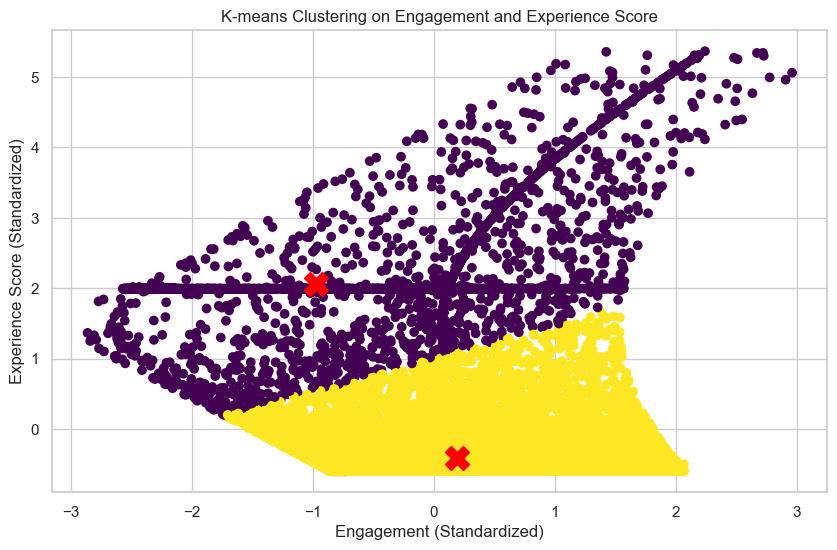

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the features for clustering
X = xdr_data_full[['Engagement Score', 'Experience Score']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and add them to the original DataFrame
xdr_data_full['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Cluster centers
plt.title('K-means Clustering on Engagement and Experience Score')
plt.xlabel('Engagement (Standardized)')
plt.ylabel('Experience Score (Standardized)')
plt.show()



In [26]:
# Ensure 'Cluster' column is already added to xdr_data_full from the previous step

# Calculate the mean satisfaction and experience score per cluster
cluster_averages = xdr_data_full.groupby('Cluster')[['Satisfaction Score', 'Experience Score']].mean()

# Display the results
print(cluster_averages)


         Satisfaction Score  Experience Score
Cluster                                      
0                  1.296471      7.107956e+06
1                  1.662092      5.195616e+05


In [27]:
# Create a final DataFrame with the specified columns
final_df = xdr_data_full[['Bearer Id', 'Engagement Score', 'Experience Score', 'Satisfaction Score']].copy()

# Add a user_id column as an index starting from 1
final_df['user_id'] = range(1, len(final_df) + 1)
final_df.set_index('user_id', inplace=True)


In [28]:
from sqlalchemy import create_engine

# Database connection parameters
host = 'localhost'
port = '5432'
dbname = 'telecommunication'
user = 'postgres'
password = 'aym'

# Create a connection string and engine
connection_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'
engine = create_engine(connection_string)

# Export the DataFrame to the SQL table
final_df.to_sql('user_scores', engine, if_exists='replace', index=True)

print("Data exported successfully to the 'user_scores' table in the telecommunication database.")


Data exported successfully to the 'user_scores' table in the telecommunication database.
